In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model, model_from_json
from tensorflow.keras import layers

In [2]:
file='E:\\RAM\\skin_deseces\\Skin GAN dataset\\Skin dataset\\'
#file='/media/ram/New Volume/RAM/New folder/OCT2017/train/'

In [3]:
def shape_data(img):
    img=cv2.resize(img,(128,128))
    img=cv2.normalize(img,None,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img  

In [6]:
ty=[]
for i,j in enumerate(os.listdir(file)):
    ty.append(j)
ty

['1', '2', '3', '4', '5', '6', '7', '8']

In [4]:
train=[]
l=0

for k,i in enumerate(os.listdir(file)):
    for j in os.listdir(os.path.join(file,i)):
        l+=1
        img=cv2.imread(os.path.join(file,i,j))
        train.append([shape_data(img),k])
        if l ==1000:
            l=0
            break

In [19]:
len(train[1]),train[1][1],len(train)

(2, 0, 8000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


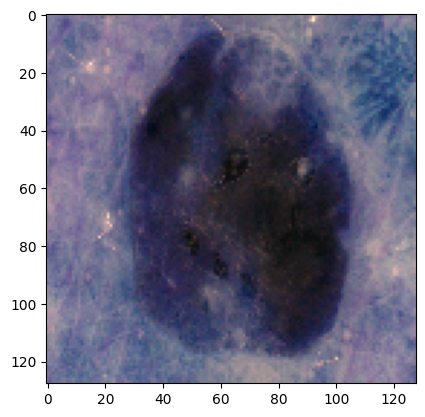

In [8]:
plt.imshow(train[0][0])

In [9]:
import random
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X,y=[],[]
for x, Y in train:
    X.append(x)
    y.append(Y)

X=np.array(X).reshape(-1,128,128,3)
y=le.fit_transform(y)
y=np.array(y)

In [10]:
import numpy as np

np.unique(y),len(np.unique(y))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), 8)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

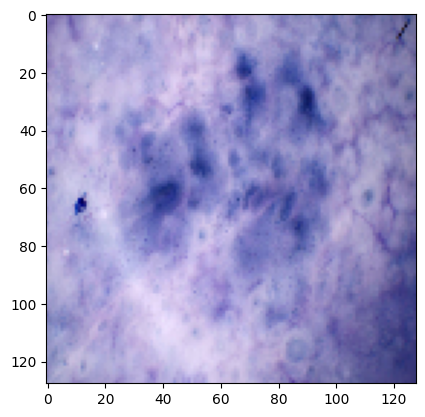

In [12]:
plt.imshow(X_train[1])

In [13]:
from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
model = Sequential()
model.add(tf.keras.applications.efficientnet_v2.EfficientNetV2S(include_top = False, weights="imagenet", input_shape=(128, 128, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(len(np.unique(y)), activation = 'softmax'))
model.layers[0].trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 4, 4, 1280)       20331360  
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 8)                 10248     
                                                                 
Total params: 20,341,608
Trainable params: 10,248
Non-trainable params: 20,331,360
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'],optimizer=RMSprop(learning_rate=0.001))
history=model.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=50,shuffle=True)
model.save('skin_desicess-effe-model_1.h5')

Epoch 1/50
86/86 [==============================] - 118s 1s/step - loss: 2.0801 - acc: 0.1439 - val_loss: 2.0711 - val_acc: 0.1427
Epoch 2/50
86/86 [==============================] - 115s 1s/step - loss: 2.0749 - acc: 0.1371 - val_loss: 2.0631 - val_acc: 0.1576
Epoch 3/50
86/86 [==============================] - 120s 1s/step - loss: 2.0723 - acc: 0.1423 - val_loss: 2.0640 - val_acc: 0.1502
Epoch 4/50
86/86 [==============================] - 114s 1s/step - loss: 2.0699 - acc: 0.1362 - val_loss: 2.0609 - val_acc: 0.1660
Epoch 5/50
86/86 [==============================] - 110s 1s/step - loss: 2.0672 - acc: 0.1583 - val_loss: 2.0765 - val_acc: 0.1343
Epoch 6/50
86/86 [==============================] - 112s 1s/step - loss: 2.0659 - acc: 0.1460 - val_loss: 2.0589 - val_acc: 0.1586
Epoch 7/50
86/86 [==============================] - 114s 1s/step - loss: 2.0639 - acc: 0.1502 - val_loss: 2.0505 - val_acc: 0.1744
Epoch 8/50
86/86 [==============================] - 116s 1s/step - loss: 2.0640 - a

In [30]:
from tensorflow.keras.models import load_model
model_1=load_model('skin_desicess-effe-model_1.h5')

In [31]:
res=np.argmax(model_1.predict(X_test[[1]]))
print(res)
plt.imshow(X_test[[1]])

1/1 [==============================] - 1s 1s/step


3

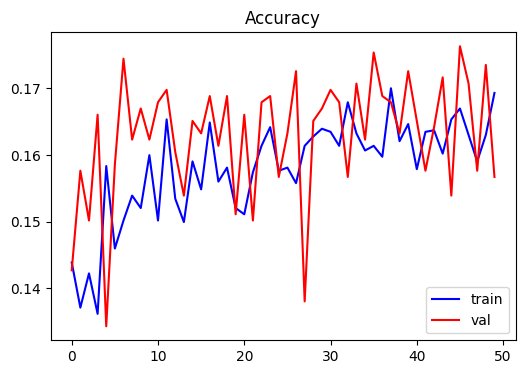

In [17]:
plt.figure(figsize=(6,4))
plt.plot(history.history['acc'], color = 'blue', label = 'train')
plt.plot(history.history['val_acc'], color = 'red', label = 'val')
plt.legend()
plt.title('Accuracy')
plt.show()

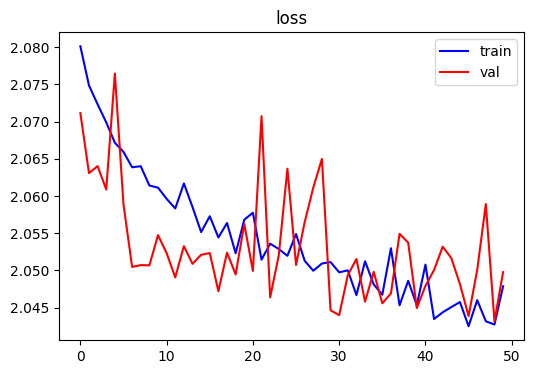

In [18]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'red', label = 'val')
plt.legend()
plt.title('loss')
plt.show()